# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
AGREEMENT_RK,15223.0,6.540183e+07,4.568181e+06,59910150.0,61920915.0,64370996.0,67088017.5,75292242.0
TARGET,15223.0,1.190304e-01,3.238349e-01,0.0,0.0,0.0,0.0,1.0
AGE,15223.0,4.040610e+01,1.160107e+01,21.0,30.0,39.0,50.0,67.0
SOCSTATUS_WORK_FL,15223.0,9.096105e-01,2.867485e-01,0.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,15223.0,1.344676e-01,3.411652e-01,0.0,0.0,0.0,0.0,1.0
GENDER,15223.0,6.545359e-01,4.755350e-01,0.0,0.0,1.0,1.0,1.0
CHILD_TOTAL,15223.0,1.099389e+00,9.954114e-01,0.0,0.0,1.0,2.0,10.0
DEPENDANTS,15223.0,6.452079e-01,8.122521e-01,0.0,0.0,0.0,1.0,7.0
REG_FACT_FL,15223.0,8.385338e-01,3.679725e-01,0.0,1.0,1.0,1.0,1.0
FACT_POST_FL,15223.0,9.511923e-01,2.154729e-01,0.0,1.0,1.0,1.0,1.0


In [6]:
df_test.describe(
).T

,count,mean,std,min,25%,50%,75%,max
AGREEMENT_RK,14910.0,6.541104e+07,4.583902e+06,59909969.0,61921696.25,64361202.0,67084140.75,75292243.0
TARGET,14910.0,1.173709e-01,3.218725e-01,0.0,0.00,0.0,0.00,1.0
AGE,14910.0,4.044346e+01,1.162914e+01,21.0,30.00,39.0,50.00,66.0
SOCSTATUS_WORK_FL,14910.0,9.086519e-01,2.881131e-01,0.0,1.00,1.0,1.00,1.0
SOCSTATUS_PENS_FL,14910.0,1.324614e-01,3.390031e-01,0.0,0.00,0.0,0.00,1.0
GENDER,14910.0,6.560698e-01,4.750341e-01,0.0,0.00,1.0,1.00,1.0
CHILD_TOTAL,14910.0,1.089001e+00,9.791199e-01,0.0,0.00,1.0,2.00,7.0
DEPENDANTS,14910.0,6.401073e-01,8.060579e-01,0.0,0.00,0.0,1.00,7.0
REG_FACT_FL,14910.0,8.346076e-01,3.715467e-01,0.0,1.00,1.0,1.00,1.0
FACT_POST_FL,14910.0,9.469484e-01,2.241440e-01,0.0,1.00,1.0,1.00,1.0


In [7]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [8]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [9]:
df = df_test.append(df_train).reset_index(drop=True)

In [10]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [12]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Неоконченное высшее', 'Среднее специальное', 'Ученая степень', 'Неполное среднее', 'Среднее', 'Высшее'}


MARITAL_STATUS
{'Разведен(а)', 'Состою в браке', 'Не состоял в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Торговля', 'СМИ/Реклама/PR-агенства', 'Здравоохранение', 'Государственная служба', 'Строительство', 'Страхование', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Информационные технологии', 'Управляющая компания', 'Туризм', 'Наука', 'Маркетинг', 'Недвижимость', 'Салоны красоты и здоровья', 'Коммунальное хоз-во/Дорожные службы', 'Логистика', 'Образование', 'Развлечения/Искусство', 'Сборочные производства', 'Нефтегазовая промышленность', 'Подбор персонала', 'Другие сферы', 'Информационные услуги', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Металлургия/Промышленность/Машиностроение', 'Транспорт', 'Энергетика', 'Банк/Финансы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [13]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [14]:
df.PERSONAL_INCOME.describe()

count    3.013300e+04
mean     1.424053e+04
std      7.532688e+04
min      2.400000e+01
25%      8.000000e+03
50%      1.200000e+04
75%      1.650000e+04
max      1.300000e+07
Name: PERSONAL_INCOME, dtype: float64

Столбцы ['CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'] трансформируем аналогичным образом

In [15]:
for x in ['CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    df[x] = df[x].map(lambda x: x.replace(',', '.')).astype('float')

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [16]:
"""
В данных есть пропуски. 

Всего строк - 30132

Данные пропущены в 5 категориальных и 2х числовых столбцах.:

GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object

WORK_TIME                     27416 non-null float64
PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

1. Значения PREVIOUS_CARD_NUM_UTILIZED нужно заменить на 0 согласно описанию данного признака:
("количество уже утилизированных карт (если пусто - 0)" ), так и сделаем. 
2. Данные, кроме WORK_TIME - числовые, пропущено строк не много, возмем медианное значение из этого 
столбца и заполним пропущеные значения. 
(В будущем можно попробовать подставить среднее т.к. медианное  = 48.0 а среднее = 189.58)

"""

'\nВ данных есть пропуски. \n\nВсего строк - 30132\n\nДанные пропущены в 5 категориальных и 2х числовых столбцах.:\n\nGEN_INDUSTRY                  27420 non-null object\nGEN_TITLE                     27420 non-null object\nORG_TP_STATE                  27420 non-null object\nORG_TP_FCAPITAL               27425 non-null object\nJOB_DIR                       27420 non-null object\nTP_PROVINCE                   29543 non-null object\n\nWORK_TIME                     27416 non-null float64\nPREVIOUS_CARD_NUM_UTILIZED    600 non-null float64\n\n1. Значения PREVIOUS_CARD_NUM_UTILIZED нужно заменить на 0 согласно описанию данного признака:\n("количество уже утилизированных карт (если пусто - 0)" ), так и сделаем. \n2. Данные, кроме WORK_TIME - числовые, пропущено строк не много, возмем медианное значение из этого \nстолбца и заполним пропущеные значения. \n(В будущем можно попробовать подставить среднее т.к. медианное  = 48.0 а среднее = 189.58)\n\n'

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [17]:
'''

Удалим пустые строки везде, где пропущены строки:

GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object

Категориальные признаки, преобразованы ранее по примеру.

'''

'\n\nУдалим пустые строки везде, где пропущены строки:\n\nGEN_INDUSTRY                  27420 non-null object\nGEN_TITLE                     27420 non-null object\nORG_TP_STATE                  27420 non-null object\nORG_TP_FCAPITAL               27425 non-null object\nJOB_DIR                       27420 non-null object\nTP_PROVINCE                   29543 non-null object\n\nКатегориальные признаки, преобразованы ранее по примеру.\n\n'

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [18]:
def preproc_data(df_input):
   
    df_output = df_input.copy()

    #0. Удалим идентификатор AGREEMENT_RK
    df_output.drop('AGREEMENT_RK', axis = 1, inplace = True)
    
    #1. Заменим пропуски на 0
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace = True)
    
    #2. Подставим медианное значение в пустые строки
    df_wt_m = df_output['WORK_TIME'].median()#это медианное значение
    df_output['WORK_TIME'].fillna(df_wt_m, inplace  = True)
    
    #3 удалим данные, которые пропущены (потери составят около 10%)
    df_output.dropna(inplace = True)
    
    #4 остается 14 категориальных признаков. с помощью метода dummies превратим их в числовые.
    df_output = pd.get_dummies(df_output, columns = ['EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR','FAMILY_INCOME','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM'])
    print(df_output.info())

    return df_output

In [19]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample','TARGET'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample','TARGET'], axis=1)

df_target_train_preproc = df_preproc.query('sample == "train"')['TARGET']
df_target_test_preproc = df_preproc.query('sample == "test"')['TARGET']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26843 entries, 0 to 30132
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), object(1), uint8(404)
memory usage: 18.5+ MB
None


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X, X_test, y, y_test = train_test_split(df_train_preproc, df_target_train_preproc, test_size = 0.3, random_state = 42)

In [21]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
tree = DecisionTreeClassifier(random_state=42)
r_f = RandomForestClassifier(random_state=42)
reg = LogisticRegression(random_state=42)

In [22]:
tree.fit(X,y)
tr_predict = tree.predict(X_test)
tr_predict_proba = tree.predict_proba(X_test)

In [23]:
r_f.fit(X,y)
r_f_predict = r_f.predict(X_test)
r_f_predict_proba = r_f.predict_proba(X_test)

In [24]:
reg.fit(X,y)
reg_predict = reg.predict(X_test)
reg_predict_proba = reg.predict_proba(X_test)

In [25]:
def metrics_scores(act_val, pred_val):
    return accuracy_score(act_val, pred_val),precision_score(act_val, pred_val),recall_score(act_val, pred_val)

In [26]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print("Desc Tree")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, tr_predict), precision_score(y_test, tr_predict),recall_score(y_test, tr_predict)))
print("Predict_proba:(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, tr_predict_proba[:,1]), precision_score(y_test, tr_predict_proba[:,1]),recall_score(y_test, tr_predict_proba[:,1])))

print("")

print("Rand Forest")
print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, r_f_predict), precision_score(y_test, r_f_predict),recall_score(y_test, r_f_predict)))
print("Predict_proba:(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, r_f_predict_proba[:,1].round()), precision_score(y_test, r_f_predict_proba[:,1].round()),recall_score(y_test, r_f_predict_proba[:,1].round())))
print("")

print("Logistics regression")

print("Predict      :(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, reg_predict), precision_score(y_test, reg_predict),recall_score(y_test, reg_predict)))
print("Predict_proba:(Acc: {} , Pres: {} , Rec: {}) :".format(accuracy_score(y_test, reg_predict_proba[:,1].round()), precision_score(y_test, reg_predict_proba[:,1].round()),recall_score(y_test, reg_predict_proba[:,1].round())))


Desc Tree
Predict      :(Acc: 0.7858020142471137 , Pres: 0.14909090909090908 , Rec: 0.16872427983539096) :
Predict_proba:(Acc: 0.7858020142471137 , Pres: 0.14909090909090908 , Rec: 0.16872427983539096) :

Rand Forest
Predict      :(Acc: 0.8771800540407763 , Pres: 0.1111111111111111 , Rec: 0.00411522633744856) :
Predict_proba:(Acc: 0.8771800540407763 , Pres: 0.1111111111111111 , Rec: 0.00411522633744856) :

Logistics regression
Predict      :(Acc: 0.8801277327437976 , Pres: 0.0 , Rec: 0.0) :
Predict_proba:(Acc: 0.8801277327437976 , Pres: 0.0 , Rec: 0.0) :


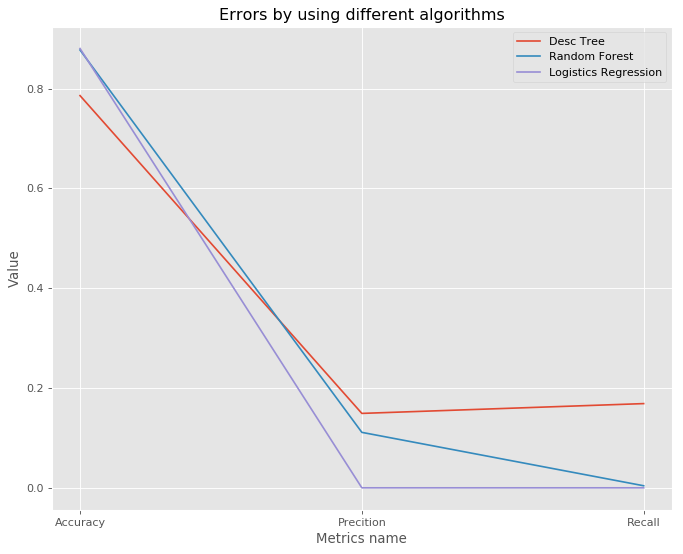

In [36]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
plt.figure(figsize=(10,8), dpi=80)
plt.xlabel('Metrics name')
plt.ylabel('Value')
plt.title('Errors by using different algorithms')
plot1 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,tr_predict), label = 'Desc Tree')
plot2 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,r_f_predict), label = 'Random Forest')
plot3 = plt.plot(['Accuracy', 'Precition', 'Recall'],metrics_scores(y_test,reg_predict), label = 'Logistics Regression')
plt.legend(loc = 'upper right')


(-0.01, 1.01)

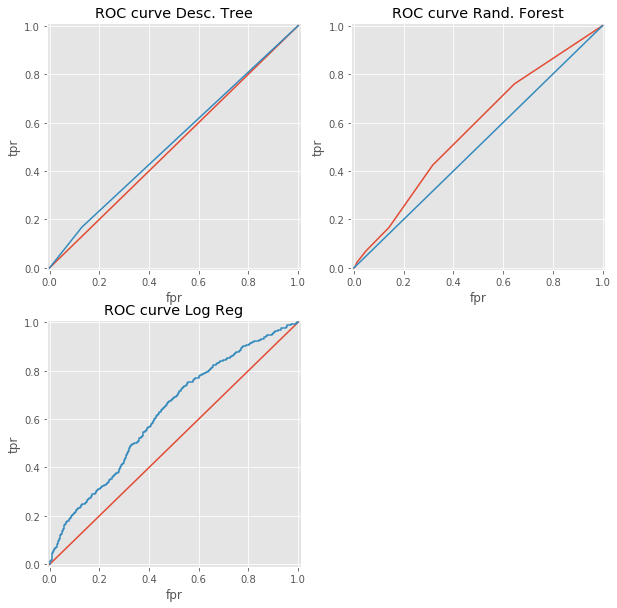

In [52]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tr_predict_proba[:,1])
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Desc. Tree')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

#второй график
fpr, tpr, thresholds = roc_curve(y_test, r_f_predict_proba[:,1])
plt.subplot(222)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Rand. Forest')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
#второй график
fpr, tpr, thresholds = roc_curve(y_test, reg_predict_proba[:,1])
plt.subplot(223)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve Log Reg')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

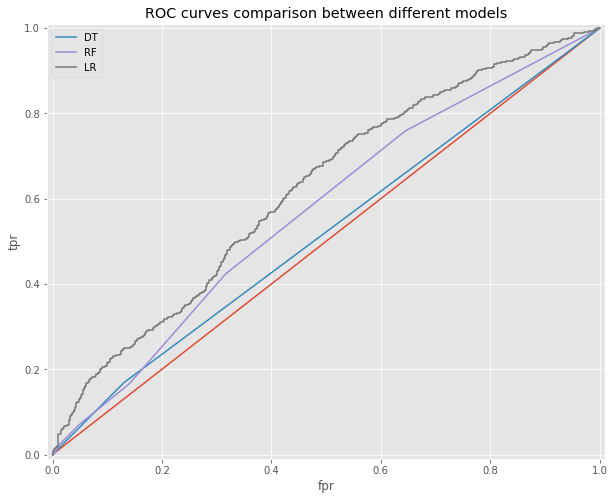

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, tr_predict_proba[:,1])
fpr_1, tpr_1, thresholds = roc_curve(y_test, r_f_predict_proba[:,1])
fpr_2, tpr_2, thresholds = roc_curve(y_test, reg_predict_proba[:,1])
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, label = 'DT')
plt.plot(fpr_1, tpr_1, label = 'RF')
plt.plot(fpr_2, tpr_2, label = 'LR')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curves comparison between different models')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [55]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
# for DT
print(np.mean(cross_val_score(
    tree,
    X,
    y,
    scoring='roc_auc',
    cv=10
)))


0.5310289451078096


In [56]:
#for RF
print(np.mean(cross_val_score(
    r_f,
    X,
    y,
    scoring='roc_auc',
    cv=10
)))

0.5820744599088415


In [57]:
#for LR
print(np.mean(cross_val_score(
    reg,
    X,
    y,
    scoring='roc_auc',
    cv=10
)))

0.6139017167174314


In [58]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
## Your Code Here
reg_predict_train_data = reg.predict_proba(df_test_preproc)

In [59]:
print(reg_predict_train_data)

[[0.84565571 0.15434429]
 [0.82869838 0.17130162]
 [0.79523117 0.20476883]
 ...
 [0.8750662  0.1249338 ]
 [0.80585917 0.19414083]
 [0.78633961 0.21366039]]


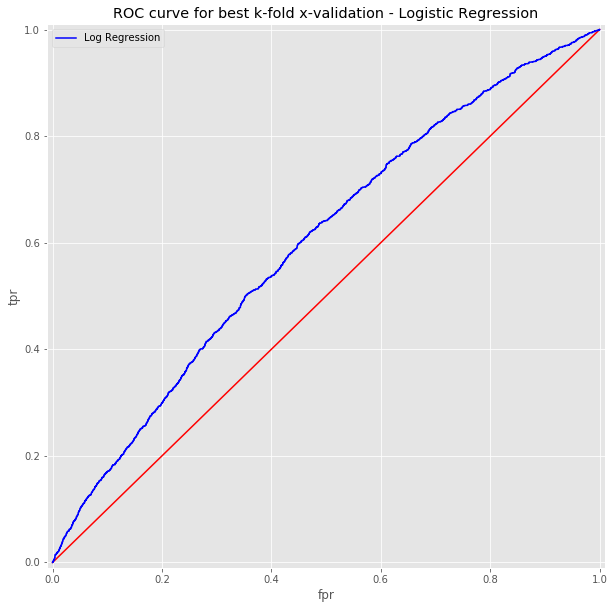

In [60]:
# Померить roc_auc на тесте
fpr, tpr, thresholds = roc_curve(df_target_test_preproc, reg_predict_train_data[:,1])
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color = 'red')
plt.plot(fpr, tpr, label = 'Log Regression', color = 'blue')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve for best k-fold x-validation - Logistic Regression')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()